In [9]:
#import necessary packages 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os

In [57]:
#concat of all Ticker data in single csv file 

data_dir='Sticker_wise'
all_data=[]

for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        data=pd.read_csv(os.path.join(data_dir,file))
        data['Ticker'] = file.split('.')[0]
        all_data.append(data)

stock_datas=pd.concat(all_data)

In [ ]:
#first step is Data preprocessing 

In [59]:
stock_datas

,Ticker,close,date,high,low,month,open,volume
0,ADANIENT,2217.30,2023-11-01 05:30:00,2312.25,2207.00,2023-11,2299.00,1666579
1,ADANIENT,2215.30,2023-11-02 05:30:00,2297.95,2204.20,2023-11,2247.00,2340997
2,ADANIENT,2229.85,2023-11-03 05:30:00,2279.00,2215.00,2023-11,2215.30,1853300
3,ADANIENT,2246.00,2023-11-06 05:30:00,2260.00,2233.00,2023-11,2253.95,770061
4,ADANIENT,2233.35,2023-11-07 05:30:00,2260.00,2226.65,2023-11,2257.00,641554
...,...,...,...,...,...,...,...,...
259,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760
260,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882
261,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889
262,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304


In [83]:
stock_datas.reset_index(drop=True, inplace=True)

In [63]:
stock_datas

,Ticker,close,date,high,low,month,open,volume
0,ADANIENT,2217.30,2023-11-01 05:30:00,2312.25,2207.00,2023-11,2299.00,1666579
1,ADANIENT,2215.30,2023-11-02 05:30:00,2297.95,2204.20,2023-11,2247.00,2340997
2,ADANIENT,2229.85,2023-11-03 05:30:00,2279.00,2215.00,2023-11,2215.30,1853300
3,ADANIENT,2246.00,2023-11-06 05:30:00,2260.00,2233.00,2023-11,2253.95,770061
4,ADANIENT,2233.35,2023-11-07 05:30:00,2260.00,2226.65,2023-11,2257.00,641554
...,...,...,...,...,...,...,...,...
13195,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760
13196,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882
13197,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889
13198,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304


In [152]:
#check the information 

stock_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ticker  13200 non-null  object 
 1   close   13200 non-null  float64
 2   date    13200 non-null  object 
 3   high    13200 non-null  float64
 4   low     13200 non-null  float64
 5   month   13200 non-null  object 
 6   open    13200 non-null  float64
 7   volume  13200 non-null  int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 825.1+ KB


In [154]:
#check the null values

stock_datas.isnull().sum()

Ticker    0
close     0
date      0
high      0
low       0
month     0
open      0
volume    0
dtype: int64

In [65]:
#duplicated value

stock_datas.duplicated().sum()

0

In [67]:
#change the datatime data type for data column

stock_datas['date']=pd.to_datetime(stock_datas['date'])

In [69]:
#check the informations 

stock_datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Ticker  13200 non-null  object        
 1   close   13200 non-null  float64       
 2   date    13200 non-null  datetime64[ns]
 3   high    13200 non-null  float64       
 4   low     13200 non-null  float64       
 5   month   13200 non-null  object        
 6   open    13200 non-null  float64       
 7   volume  13200 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 825.1+ KB


In [71]:
#i have sort by Trickers and date 

stock_datas.sort_values(['Ticker', 'date'], inplace=True)

In [85]:
stock_datas

,Ticker,close,date,high,low,month,open,volume,Daily Return
0,ADANIENT,2215.30,2023-11-02 05:30:00,2297.95,2204.20,2023-11,2247.00,2340997,-0.000902
1,ADANIENT,2229.85,2023-11-03 05:30:00,2279.00,2215.00,2023-11,2215.30,1853300,0.006568
2,ADANIENT,2246.00,2023-11-06 05:30:00,2260.00,2233.00,2023-11,2253.95,770061,0.007243
3,ADANIENT,2233.35,2023-11-07 05:30:00,2260.00,2226.65,2023-11,2257.00,641554,-0.005632
4,ADANIENT,2259.95,2023-11-08 05:30:00,2298.00,2235.00,2023-11,2245.30,1169180,0.011910
...,...,...,...,...,...,...,...,...,...
13145,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,-0.004042
13146,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,-0.024440
13147,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,0.016551
13148,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,-0.008630


In [73]:
#first 5 datas using head()

stock_data.head()

,Ticker,close,date,high,low,open,volume
0,ADANIENT,2217.30,2023-11-01 05:30:00,2312.25,2207.00,2299.00,1666579
1,ADANIENT,2215.30,2023-11-02 05:30:00,2297.95,2204.20,2247.00,2340997
2,ADANIENT,2229.85,2023-11-03 05:30:00,2279.00,2215.00,2215.30,1853300
3,ADANIENT,2246.00,2023-11-06 05:30:00,2260.00,2233.00,2253.95,770061
4,ADANIENT,2233.35,2023-11-07 05:30:00,2260.00,2226.65,2257.00,641554


In [75]:
#calculate Daily Return

stock_datas['Daily Return'] = stock_datas.groupby('Ticker')['close'].pct_change()

In [77]:
stock_datas

,Ticker,close,date,high,low,month,open,volume,Daily Return
0,ADANIENT,2217.30,2023-11-01 05:30:00,2312.25,2207.00,2023-11,2299.00,1666579,NaN
1,ADANIENT,2215.30,2023-11-02 05:30:00,2297.95,2204.20,2023-11,2247.00,2340997,-0.000902
2,ADANIENT,2229.85,2023-11-03 05:30:00,2279.00,2215.00,2023-11,2215.30,1853300,0.006568
3,ADANIENT,2246.00,2023-11-06 05:30:00,2260.00,2233.00,2023-11,2253.95,770061,0.007243
4,ADANIENT,2233.35,2023-11-07 05:30:00,2260.00,2226.65,2023-11,2257.00,641554,-0.005632
...,...,...,...,...,...,...,...,...,...
13195,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,-0.004042
13196,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,-0.024440
13197,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,0.016551
13198,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,-0.008630


In [79]:
stock_datas.dropna(subset=['Daily Return'], inplace=True)

In [87]:
stock_datas

,Ticker,close,date,high,low,month,open,volume,Daily Return
0,ADANIENT,2215.30,2023-11-02 05:30:00,2297.95,2204.20,2023-11,2247.00,2340997,-0.000902
1,ADANIENT,2229.85,2023-11-03 05:30:00,2279.00,2215.00,2023-11,2215.30,1853300,0.006568
2,ADANIENT,2246.00,2023-11-06 05:30:00,2260.00,2233.00,2023-11,2253.95,770061,0.007243
3,ADANIENT,2233.35,2023-11-07 05:30:00,2260.00,2226.65,2023-11,2257.00,641554,-0.005632
4,ADANIENT,2259.95,2023-11-08 05:30:00,2298.00,2235.00,2023-11,2245.30,1169180,0.011910
...,...,...,...,...,...,...,...,...,...
13145,WIPRO,566.70,2024-11-14 05:30:00,574.55,564.20,2024-11,568.95,4891760,-0.004042
13146,WIPRO,552.85,2024-11-18 05:30:00,566.70,540.30,2024-11,566.70,7644882,-0.024440
13147,WIPRO,562.00,2024-11-19 05:30:00,569.80,554.70,2024-11,556.00,6459889,0.016551
13148,WIPRO,557.15,2024-11-21 05:30:00,567.60,555.30,2024-11,562.00,5836304,-0.008630


In [89]:
#Calculate Cumulative Retrun based 2023 start close price and 2024 end close price 

stock_datas['Cumulative Return'] = stock_datas.groupby('Ticker')['close'].transform(lambda x: x / x.iloc[0])

In [91]:
stock_da=stock_datas.drop(columns='month')

In [93]:
stock_da.head()

,Ticker,close,date,high,low,open,volume,Daily Return,Cumulative Return
0,ADANIENT,2215.30,2023-11-02 05:30:00,2297.95,2204.20,2247.00,2340997,-0.000902,1.000000
1,ADANIENT,2229.85,2023-11-03 05:30:00,2279.00,2215.00,2215.30,1853300,0.006568,1.006568
2,ADANIENT,2246.00,2023-11-06 05:30:00,2260.00,2233.00,2253.95,770061,0.007243,1.013858
3,ADANIENT,2233.35,2023-11-07 05:30:00,2260.00,2226.65,2257.00,641554,-0.005632,1.008148
4,ADANIENT,2259.95,2023-11-08 05:30:00,2298.00,2235.00,2245.30,1169180,0.011910,1.020155


In [97]:
#check the null values

stock_da.isnull().sum()

Ticker               0
close                0
date                 0
high                 0
low                  0
open                 0
volume               0
Daily Return         0
Cumulative Return    0
dtype: int64

In [99]:
#Calculate Yearly Return using groupby Ticker 

yearly_return = stock_da.groupby('Ticker').apply(
    lambda x: (x['close'].iloc[-1] / x['close'].iloc[0]) - 1).reset_index(name='Yearly Return')

C:\Users\vnave\AppData\Local\Temp\ipykernel_9276\461756101.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_return = stock_da.groupby('Ticker').apply(


In [101]:
yearly_return

,Ticker,Yearly Return
0,ADANIENT,0.005733
1,ADANIPORTS,0.468100
2,APOLLOHOSP,0.419091
3,ASIANPAINT,-0.163497
4,AXISBANK,0.162216
5,BAJAJ-AUTO,0.782801
6,BAJAJFINSV,0.016026
7,BAJFINANCE,-0.102717
8,BEL,1.084230
9,BHARTIARTL,0.698652


In [77]:
# Top 10 Green stocks / Loss Stocks

top_10_green = yearly_return.sort_values(by='Yearly Return', ascending=False).head(10)
top_10_loss = yearly_return.sort_values(by='Yearly Return').head(10)

In [79]:
#Top 10 Green Stocks

top_10_green

,Ticker,Yearly Return
47,TRENT,2.038016
8,BEL,1.084230
30,M&M,1.050044
5,BAJAJ-AUTO,0.782801
9,BHARTIARTL,0.698652
35,POWERGRID,0.659035
10,BPCL,0.585589
40,SUNPHARMA,0.584764
20,HEROMOTOCO,0.570755
45,TECHM,0.566517


In [81]:
#Top 10 loss stocks

top_10_loss

,Ticker,Yearly Return
24,INDUSINDBK,-0.316863
3,ASIANPAINT,-0.163497
7,BAJFINANCE,-0.102717
32,NESTLEIND,-0.067967
22,HINDUNILVR,-0.016708
0,ADANIENT,0.005733
28,KOTAKBANK,0.013667
6,BAJAJFINSV,0.016026
46,TITAN,0.033484
41,TATACONSUM,0.050152


In [83]:
# Market Summary

green_count = (yearly_return['Yearly Return'] > 0).sum()
print('Green Stocks',green_count)

Green Stocks 45


In [85]:
# Market Summary

red_count = (yearly_return['Yearly Return'] < 0).sum()
avg_price = stock_da['close'].mean()
avg_volume = stock_da['volume'].mean()

In [87]:
print('Red Stocks:',red_count)
print('Average Price:',avg_price)
print('Average Volume:',avg_volume)

Red Stocks: 5
Average Price: 2483.4771749049432
Average Volume: 7007935.369429658


In [89]:
#Calculate the Volatility Analysis
# (Close Price - Previous Close Price) / Previous Close Price

volatility = stock_da.groupby('Ticker')['Daily Return'].std().reset_index(name='Volatility')

In [91]:
top_10_volatility=volatility.sort_values(by='Volatility',ascending=False).head(10)

In [93]:
top_10_volatility

,Ticker,Volatility
0,ADANIENT,0.029218
1,ADANIPORTS,0.026583
8,BEL,0.023817
47,TRENT,0.023491
34,ONGC,0.022920
10,BPCL,0.022545
13,COALINDIA,0.021675
39,SHRIRAMFIN,0.021491
21,HINDALCO,0.020056
33,NTPC,0.019898


In [97]:
#Then Save individual csv file for Top 10 Volatilitys

top_10_volatility.to_csv('Top_10_volatility.csv',index=False)

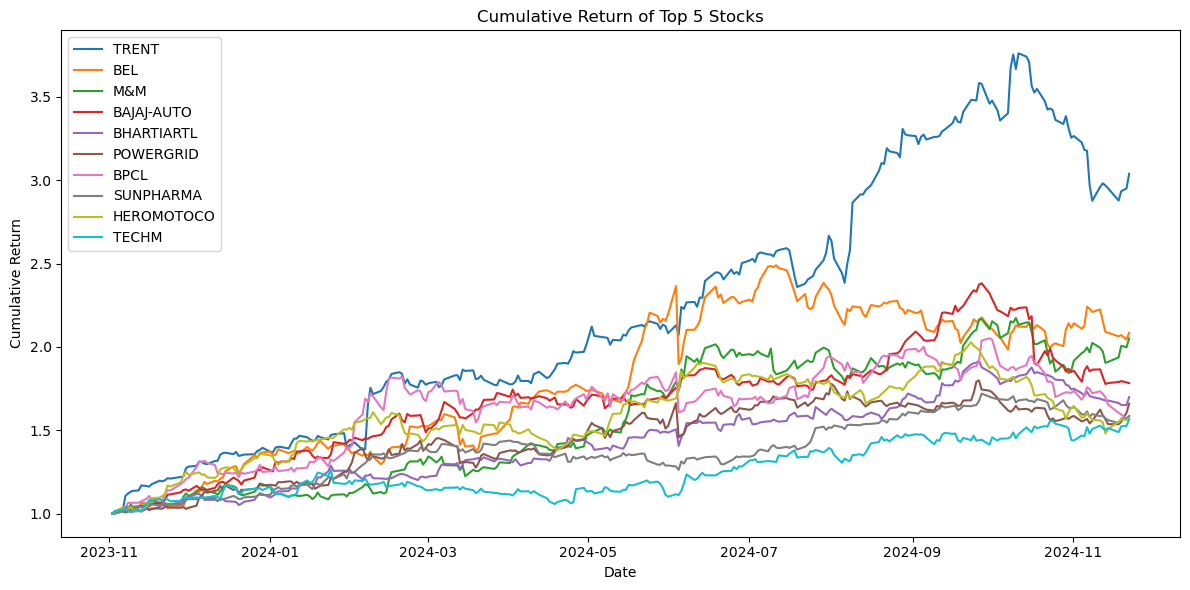

In [107]:
#Cumulative Return for Top 10 Performing Stocks using Line Plot

top_5 = top_10_green['Ticker'].tolist()

plt.figure(figsize=(12, 6))
for ticker in top_5:
    sub_data = stock_da[stock_da['Ticker'] == ticker]
    plt.plot(sub_data['date'], sub_data['Cumulative Return'], label=ticker)
plt.legend()
plt.title('Cumulative Return of Top 5 Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.tight_layout()
plt.show()

In [132]:
top_10_greens=top_10_green.head()

In [136]:
# save the Individual file for Top 5 Cumulative Returns 

top_10_greens.to_csv('Top_5_Cumulative_Return.csv',index=False)

In [150]:
sector_data=sector_df.drop(columns='COMPANY')

In [156]:
sector_data.head()

,sector,Symbol
0,MISCELLANEOUS,ADANIGREEN
1,MISCELLANEOUS,ADANIPORTS
2,MISCELLANEOUS,APOLLOHOSP
3,PAINTS,ASIANPAINT
4,BANKING,AXISBANK


In [154]:
# Split on colon and take the part after it (index 1), and strip any whitespace

sector_data['Symbol'] = sector_data['Symbol'].str.split(':').str[1].str.strip()


In [162]:
#sort the Symbol wise 

sector_data_sorted = sector_data.sort_values(by='Symbol')


In [166]:
sector_data_sorted.reset_index(drop=True, inplace=True)

In [168]:
sector_data_sorted

,sector,Symbol
0,MISCELLANEOUS,ADANIGREEN
1,MISCELLANEOUS,ADANIPORTS
2,TELECOM,AIRTEL
3,MISCELLANEOUS,APOLLOHOSP
4,PAINTS,ASIANPAINT
5,BANKING,AXISBANK
6,AUTOMOBILES,BAJAJ-AUTO
7,FINANCE,BAJAJFINSV
8,FINANCE,BAJFINANCE
9,DEFENCE,BEL


In [172]:
#Rename the Symbol to Ticker

sector_data_sorted.rename(columns={'Symbol': 'Ticker'}, inplace=True)


In [176]:
sector_data_sorted

,sector,Ticker
0,MISCELLANEOUS,ADANIGREEN
1,MISCELLANEOUS,ADANIPORTS
2,TELECOM,AIRTEL
3,MISCELLANEOUS,APOLLOHOSP
4,PAINTS,ASIANPAINT
5,BANKING,AXISBANK
6,AUTOMOBILES,BAJAJ-AUTO
7,FINANCE,BAJAJFINSV
8,FINANCE,BAJFINANCE
9,DEFENCE,BEL


In [178]:
#Then save the Sector file 

sector_data_sorted.to_csv('Sector_data.csv',index=False)

In [103]:
#Merge the Sector file and Yearly return

sector_file = pd.read_csv('Sector_data.csv')  # must have columns Ticker, Sector
sector_datas = pd.merge(yearly_return, sector_file, on='Ticker')
sector_perf = sector_datas.groupby('sector')['Yearly Return'].mean().reset_index()

In [105]:
sector_perf

,sector,Yearly Return
0,ALUMINIUM,0.375158
1,AUTOMOBILES,0.535638
2,BANKING,0.142791
3,CEMENT,0.344757
4,DEFENCE,1.084230
5,ENERGY,0.331790
6,ENGINEERING,0.234879
7,FINANCE,0.123749
8,FMCG,-0.016708
9,FOOD & TOBACCO,0.016463


C:\Users\vnave\AppData\Local\Temp\ipykernel_6788\275814336.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sector_perf, x='sector', y='Yearly Return', palette='coolwarm')


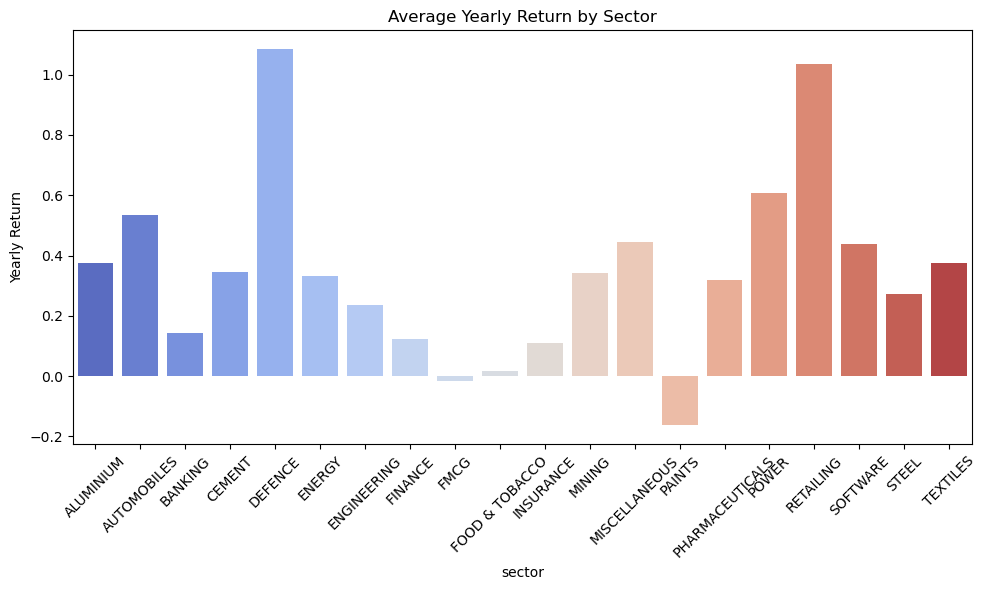

In [189]:
#Plot a bar chart showing the average performance for each sector.

plt.figure(figsize=(10, 6))
sns.barplot(data=sector_perf, x='sector', y='Yearly Return', palette='coolwarm')
plt.title('Average Yearly Return by Sector')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [107]:
# Save the Individual file for Sector_wise_Performance

sector_perf.to_csv('Sector_wise_Performance.csv',index=False)

In [195]:
#Calculate the Stock Price Correlation Heatmap

pivot_close = stocks.pivot_table(index='date', columns='Ticker', values='close')
returns = pivot_close.pct_change()
corr_matrix = returns.corr()

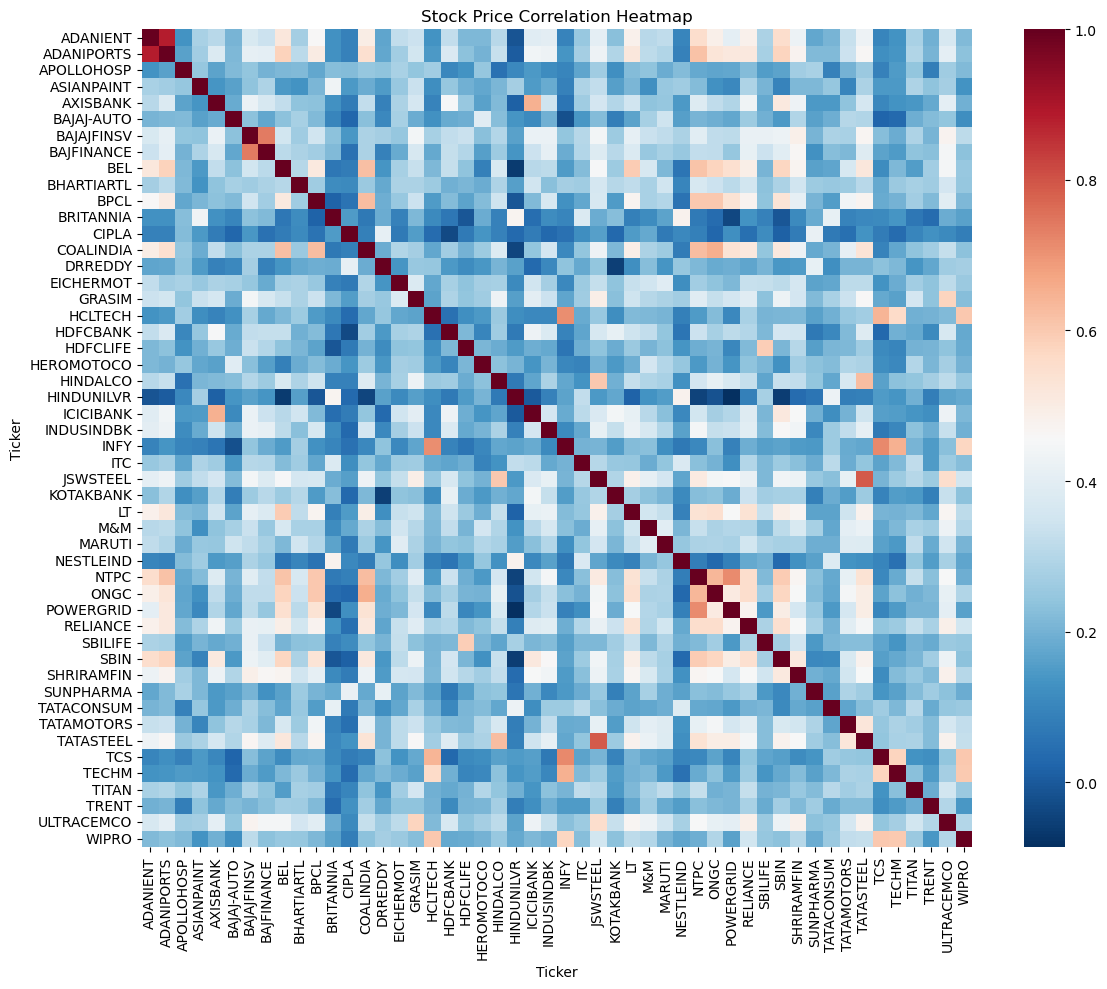

In [197]:
#A heatmap to show the correlation between the closing prices of various stocks. Darker colors represent higher correlations

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='RdBu_r', annot=False)
plt.title('Stock Price Correlation Heatmap')
plt.tight_layout()
plt.show()

In [201]:
#Save the Individual csv file in Stock price Correlation

corr_matrix.to_csv('Stock_Price_Correlation.csv',index=False)

In [204]:
# Calculate the Top 5 Gainers and Losers (Month-wise)

stocks['Month'] = stocks['date'].dt.to_period('M')
monthly_returns = stocks.groupby(['Ticker', 'Month'])['close'].apply(lambda x: x.iloc[-1] / x.iloc[0] - 1).reset_index(name='Monthly Return')

In [209]:
for month in monthly_returns['Month'].unique():
    month_df = monthly_returns[monthly_returns['Month'] == month]
    top5 = month_df.sort_values(by='Monthly Return', ascending=False).head(5)
    bottom5 = month_df.sort_values(by='Monthly Return').head(5)

In [225]:
#save the individual csv file in Top 5 Gainers

top5.to_csv('Top_5_Gainers.csv',index=False)

In [227]:
#save the individual csv file in Top 5 Losers

bottom5.to_csv('Top_5_Losers.csv',index=False)

C:\Users\vnave\AppData\Local\Temp\ipykernel_6788\429750870.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5, x='Ticker', y='Monthly Return', palette='Greens')


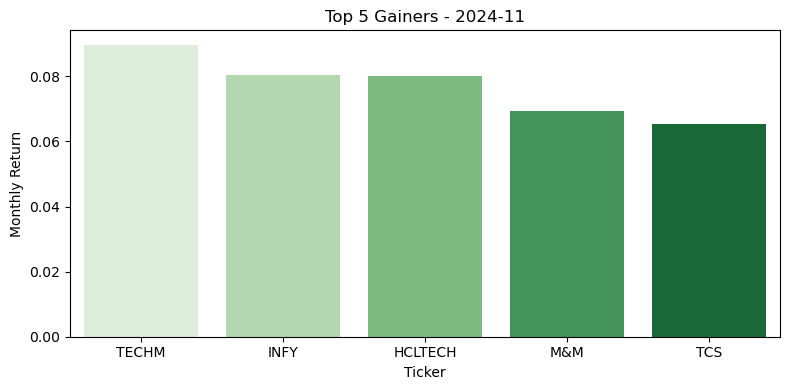

In [221]:
#Plot the Top 5 Gainers using Barplot

plt.figure(figsize=(8, 4))
sns.barplot(data=top5, x='Ticker', y='Monthly Return', palette='Greens')
plt.title(f'Top 5 Gainers - {month}')
plt.tight_layout()
plt.show()

C:\Users\vnave\AppData\Local\Temp\ipykernel_6788\694949715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom5, x='Ticker', y='Monthly Return', palette='Reds')


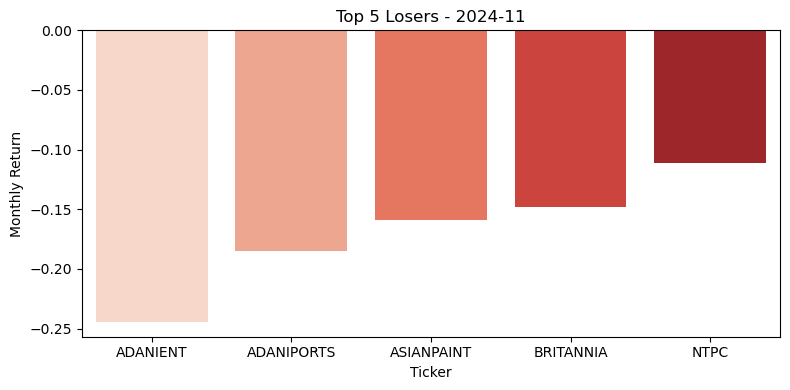

In [223]:
#Plot the Top 5 Losers using Barplot

plt.figure(figsize=(8, 4))
sns.barplot(data=bottom5, x='Ticker', y='Monthly Return', palette='Reds')
plt.title(f'Top 5 Losers - {month}')
plt.tight_layout()
plt.show()

In [ ]:
#Mysql Process for Store the All datas 

In [1]:
import pymysql

In [152]:
#Connect the Mysql
connection = pymysql.connect(
        host='localhost',
        port=3306,
        user='root',
        password='Chandru$04',
        database='powerbi'
    )

In [156]:
cursor = connection.cursor()

In [11]:
vol=pd.read_csv('Top_10_volatility.csv')

,Ticker,Volatility
0,ADANIENT,0.029218
1,ADANIPORTS,0.026583
2,BEL,0.023817
3,TRENT,0.023491
4,ONGC,0.022920
5,BPCL,0.022545
6,COALINDIA,0.021675
7,SHRIRAMFIN,0.021491
8,HINDALCO,0.020056
9,NTPC,0.019898


In [15]:
#sql query for Create the table

cursor.execute("""CREATE TABLE Top_10_volatility (
                                        Ticker VARCHAR(100),
                                        Volatility FLOAT
                                    );""")

0

In [19]:
# SQL INSERT query

insert_query = """INSERT INTO Top_10_volatility (Ticker, Volatility) VALUES (%s, %s)"""

# Insert rows from the DataFrame
for index, row in vol.iterrows():
      values = (row['Ticker'], row['Volatility'])
      cursor.execute(insert_query,values)

# Commit the transaction
connection.commit()

In [36]:
cumulative=pd.read_csv('Top_5_Cumulative_Return.csv')
cumulative

,Ticker,Yearly Return
0,TRENT,2.038016
1,BEL,1.084230
2,M&M,1.050044
3,BAJAJ-AUTO,0.782801
4,BHARTIARTL,0.698652


In [45]:
cumulative

,Ticker,Yearly_Return
0,TRENT,2.038016
1,BEL,1.084230
2,M&M,1.050044
3,BAJAJ-AUTO,0.782801
4,BHARTIARTL,0.698652


In [49]:
#Create the Table table for Cumulative Return Over Time

cursor.execute("""CREATE TABLE cumulative_returns (
                                        Ticker VARCHAR(100),
                                        Yearly_Return FLOAT
                                    );""")

0

In [51]:
# SQL INSERT query
insert_query = """INSERT INTO cumulative_returns (Ticker, Yearly_Return) VALUES (%s, %s)"""

# Insert rows from the DataFrame
for index, row in cumulative.iterrows():
      values = (row['Ticker'], row['Yearly_Return'])
      cursor.execute(insert_query,values)

# Commit the transaction
connection.commit()

In [119]:
#Create the Table for Sector-wise Performance 

cursor.execute("""CREATE TABLE sector_wise_performance (
                                        sector VARCHAR(100),
                                        Yearly_Return FLOAT
                                    );""")

0

In [121]:
# SQL INSERT query
insert_query = """INSERT INTO sector_wise_performance (sector, Yearly_Return) VALUES (%s, %s)"""

# Insert rows from the DataFrame
for index, row in sector_wise.iterrows():
      values = (row['sector'], row['Yearly_Return'])
      cursor.execute(insert_query,values)

# Commit the transaction
connection.commit()

In [111]:
sector_wise.rename(columns={'Yearly Return':'Yearly_Return'},inplace=True)

In [113]:
sector_wise

,sector,Yearly_Return
0,ALUMINIUM,0.375158
1,AUTOMOBILES,0.535638
2,BANKING,0.142791
3,CEMENT,0.344757
4,DEFENCE,1.084230
5,ENERGY,0.331790
6,ENGINEERING,0.234879
7,FINANCE,0.123749
8,FMCG,-0.016708
9,FOOD & TOBACCO,0.016463


In [109]:
sector_wise=pd.read_csv('Sector_wise_Performance.csv')


,sector,Yearly Return
0,ALUMINIUM,0.375158
1,AUTOMOBILES,0.535638
2,BANKING,0.142791
3,CEMENT,0.344757
4,DEFENCE,1.084230
5,ENERGY,0.331790
6,ENGINEERING,0.234879
7,FINANCE,0.123749
8,FMCG,-0.016708
9,FOOD & TOBACCO,0.016463


In [126]:
gainers=pd.read_csv('Top_5_Gainers.csv')
gainers

,Ticker,Month,Monthly Return
0,TECHM,2024-11,0.089670
1,INFY,2024-11,0.080302
2,HCLTECH,2024-11,0.080232
3,M&M,2024-11,0.069313
4,TCS,2024-11,0.065358


In [128]:
gainers.rename(columns={'Monthly Return':'Monthly_Return'},inplace=True)

In [160]:
gainers

,Ticker,Month,Monthly_Return
0,TECHM,2024-11,0.089670
1,INFY,2024-11,0.080302
2,HCLTECH,2024-11,0.080232
3,M&M,2024-11,0.069313
4,TCS,2024-11,0.065358


In [158]:
#Create the Table for Top 5 Gainer

cursor.execute("""CREATE TABLE gainer_to_5 (
                                        Ticker VARCHAR(100),
                                        Month VARCHAR(100),
                                        Monthly_Return FLOAT
                                    );""")

0

In [162]:
# SQL INSERT query
insert_query = """INSERT INTO gainer_to_5 (Ticker, Month, Monthly_Return) VALUES (%s, %s, %s)"""

# Insert rows from the DataFrame
for index, row in gainers.iterrows():
      values = (row['Ticker'], row['Month'],row['Monthly_Return'])
      cursor.execute(insert_query,values)

# Commit the transaction
connection.commit()

In [164]:
losser=pd.read_csv('Top_5_Losers.csv')
losser

,Ticker,Month,Monthly Return
0,ADANIENT,2024-11,-0.244618
1,ADANIPORTS,2024-11,-0.184775
2,ASIANPAINT,2024-11,-0.159073
3,BRITANNIA,2024-11,-0.148374
4,NTPC,2024-11,-0.111584


In [166]:
losser.rename(columns={'Monthly Return':'Monthly_Return'},inplace=True)

In [168]:
losser

,Ticker,Month,Monthly_Return
0,ADANIENT,2024-11,-0.244618
1,ADANIPORTS,2024-11,-0.184775
2,ASIANPAINT,2024-11,-0.159073
3,BRITANNIA,2024-11,-0.148374
4,NTPC,2024-11,-0.111584


In [170]:
#Create the Table for Top 5 Losers

cursor.execute("""CREATE TABLE losers_top_5 (
                                        Ticker VARCHAR(100),
                                        Month VARCHAR(100),
                                        Monthly_Return FLOAT
                                    );""")

0

In [172]:
# SQL INSERT query
insert_query = """INSERT INTO losers_top_5 (Ticker, Month, Monthly_Return) VALUES (%s, %s, %s)"""

# Insert rows from the DataFrame
for index, row in losser.iterrows():
      values = (row['Ticker'], row['Month'],row['Monthly_Return'])
      cursor.execute(insert_query,values)

# Commit the transaction
connection.commit()